In [1]:
import numpy as np
import pandas as pd

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("./UDEMY_TSA_FINAL/Data/co2_mm_mlo.csv")

In [6]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
#adding date to datetime column

df["date"]=pd.to_datetime(dict(year=df["year"], month=df["month"],day=1))

In [9]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
df.set_index("date",inplace=True)
df.index.freq="MS"
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


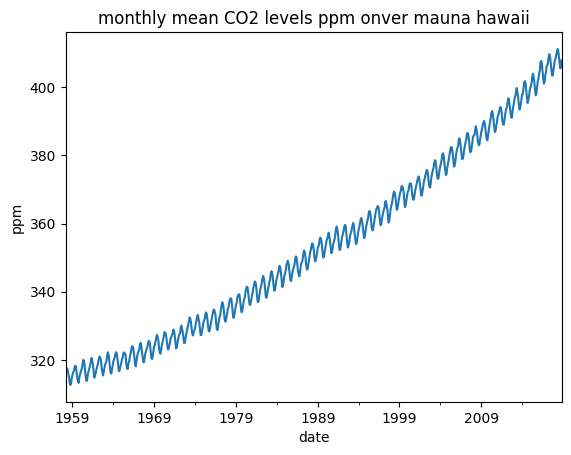

In [15]:
df["interpolated"].plot(title="monthly mean CO2 levels ppm onver mauna hawaii",ylabel="ppm");

### ETS Decomposition to get trend, seasonal and residual comp

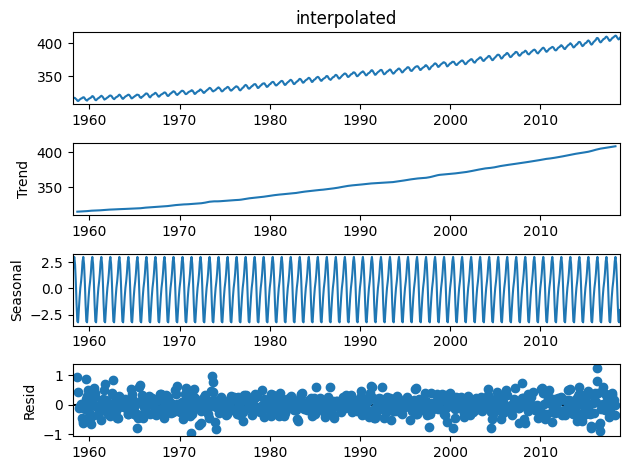

In [17]:
result=seasonal_decompose(df["interpolated"],model="add")
result.plot();

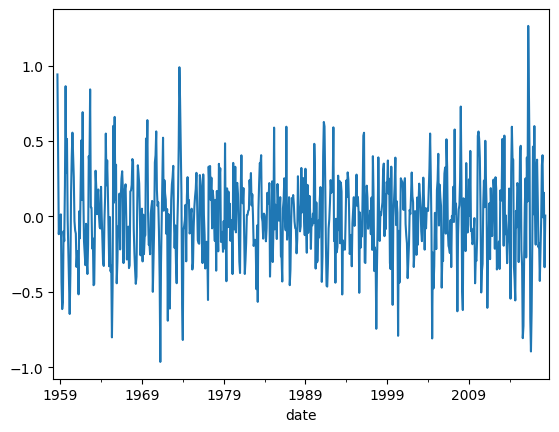

In [19]:
result.resid.plot();

In [21]:
# running auto arima to get orders
auto_arima(df["interpolated"],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -205.701
Date:                              Tue, 11 Jul 2023   AIC                            423.401
Time:                                      16:31:10   BIC                            450.943
Sample:                                  03-01-1958   HQIC                           434.028
                                       - 11-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3597      0.035    -10.155      0.000      -0.429      -0.290
ma.L2         -0.0209      0.023     -0.907      0.364      -0.066       0.024
ma.L3         -0.0846      0.028     -3.073      0.002      -0.139      -0.031
ar.S.L12       0.9996      0.000   2907.978      0.000       0.999       1.000
ma.S.L12      -0.8652      0.021    -40.332      0.000      -0.907      -0.823
sigma2         0.0957      0.005     20.416      0.000       0.087       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.01
Prob(Q):                              0.86   Prob(JB):                         0.13
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### train test split

In [22]:
len(df)

729

In [23]:
train=df.iloc[:717]
test=df.iloc[717:]

#### fitting sarima 0,1,3   1,0,1,12 model

In [24]:
model=SARIMAX(train["interpolated"],order=(0,1,3),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.192
Date:                              Tue, 11 Jul 2023   AIC                            414.384
Time:                                      17:20:12   BIC                            441.827
Sample:                                  03-01-1958   HQIC                           424.981
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3540      0.034    -10.395      0.000      -0.421      -0.287
ma.L2         -0.0246      0.028     -0.890      0.373      -0.079       0.030
ma.L3         -0.0872      0.028     -3.095      0.002      -0.142      -0.032
ar.S.L12       0.9996      0.000   2773.712      0.000       0.999       1.000
ma.S.L12      -0.8652      0.023    -38.199      0.000      -0.910      -0.821
sigma2         0.0951      0.005     20.359      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 4.30
Prob(Q):                              0.78   Prob(JB):                         0.12
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### getting predicted vals

In [25]:
start=len(train)
end=len(train)+len(test)-1
predictions=results.predict(start=start,end=end,dynamic=False,typ="levels").rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

#### dynmic false means foreacst generates full history up to that point, all lagge vals

In [31]:
#comparing preds with exp vals

for i in range(len(predictions)):
    print(f"predicted={predictions[i]:11.10},expected= {test['interpolated'][i]}")

predicted=406.6102783,expected= 406.81
predicted=407.8258053,expected= 407.96
predicted= 408.579314,expected= 408.32
predicted=409.4844074,expected= 409.41
predicted=411.0424946,expected= 410.24
predicted= 411.645778,expected= 411.24
predicted=410.8651171,expected= 410.79
predicted=409.1744461,expected= 408.71
predicted=407.0741771,expected= 406.99
predicted=405.6241853,expected= 405.51
predicted=405.8953088,expected= 406.0
predicted=407.4295104,expected= 408.02


In [32]:
#plottint the pred and exp valss

<AxesSubplot:title={'center':'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'}, xlabel='date', ylabel='ppm'>

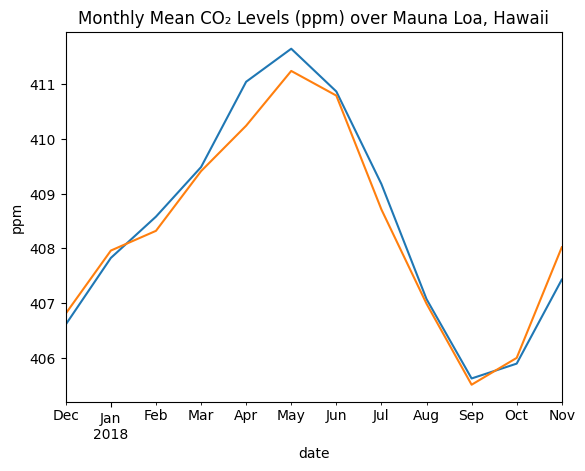

In [35]:
predictions.plot()
test["interpolated"].plot(title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii', ylabel="ppm")

### evaluating the model, getting error parameters

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [37]:
error1=mean_squared_error(test["interpolated"],predictions)
error2=mean_absolute_error(test["interpolated"],predictions)
error3=mean_absolute_percentage_error(test["interpolated"],predictions)
error4=rmse(test["interpolated"],predictions)

In [38]:
print(f"SARIMA(0,1,3)(1,0,1,12) MSE Error: {error1:11.10}")
print(f"SARIMA(0,1,3)(1,0,1,12) MAE Error: {error2:11.10}")
print(f"SARIMA(0,1,3)(1,0,1,12) MAPE Error: {error3:11.10}")
print(f"SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error4:11.10}")


SARIMA(0,1,3)(1,0,1,12) MSE Error: 0.1283704666
SARIMA(0,1,3)(1,0,1,12) MAE Error: 0.2757513993
SARIMA(0,1,3)(1,0,1,12) MAPE Error: 0.0006743577913
SARIMA(0,1,3)(1,0,1,12) RMSE Error: 0.3582882451


## Forcasting the future using full data

In [46]:
model=SARIMAX(df["interpolated"],order=(0,1,3),seasonal_order=(1,0,1,12))
results=model.fit()
fcast=results.predict(len(df),len(df)+100,typ="levels").rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

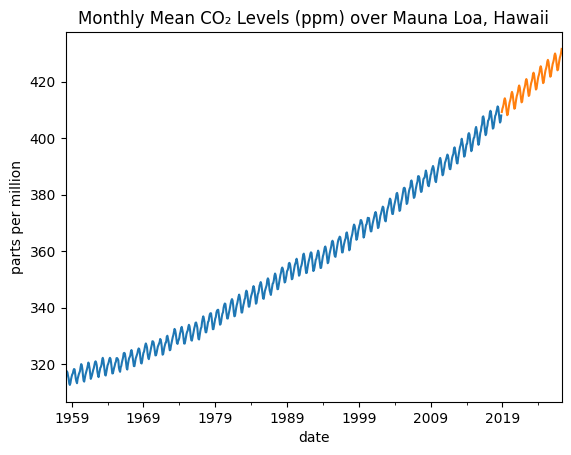

In [48]:
df["interpolated"].plot()
fcast.plot(title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii',
ylabel='parts per million');